In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('Customer_churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.drop(labels = ['CustomerId','Surname','RowNumber'],axis =1)
y = dataset['Exited']

In [9]:
X.shape,y.shape

((10000, 11), (10000,))

In [11]:
# convert string values into numerical values
from sklearn.preprocessing import LabelEncoder

In [14]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# one hot encoding so that the models do not think of them as meaning degree
X = pd.get_dummies(X, drop_first = True, columns = ['Geography'])
X.head()

KeyError: "None of [Index(['Geography'], dtype='object')] are in the [columns]"

### Feature Standardization

In [49]:
# very high variance in data is never recommended over the dataset 
from sklearn.preprocessing import StandardScaler

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 0, stratify = y)

In [51]:
# normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [23]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.97686   ,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -0.50585272,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ..., -0.50585272,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ...,  1.97686   ,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -0.50585272,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ..., -0.50585272,
        -0.57812007,  1.73900686]])

### Building Artificial Neural Network

In [52]:
model = Sequential()
model.add(Dense(X.shape[1], activation = 'relu', input_dim=X.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [53]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
# if train is pandas/numpy array then also should y
history = model.fit(X_train,y_train.to_numpy(),batch_size = 10, epochs = 10, verbose = 1, validation_split= 0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 6s 884us/sample - loss: 0.0960 - accuracy: 0.9664 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/10
6400/6400 [==============================] - 4s 609us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3376e-04 - val_accuracy: 1.0000
Epoch 3/10
6400/6400 [==============================] - 4s 559us/sample - loss: 2.8664e-04 - accuracy: 1.0000 - val_loss: 1.5800e-04 - val_accuracy: 1.0000
Epoch 4/10
6400/6400 [==============================] - 4s 607us/sample - loss: 1.2245e-04 - accuracy: 1.0000 - val_loss: 7.7323e-05 - val_accuracy: 1.0000
Epoch 5/10
6400/6400 [==============================] - 3s 525us/sample - loss: 6.3802e-05 - accuracy: 1.0000 - val_loss: 4.3340e-05 - val_accuracy: 1.0000
Epoch 6/10
6400/6400 [==============================] - 3s 502us/sample - loss: 3.6675e-05 - accuracy: 1.0000 - val_loss: 2.6678e-05 - val_accuracy: 1.0000
Epoch 7/10
6400/6400 [======

In [30]:
y_pred = model.predict_classes(X_test)

In [32]:
model.evaluate(X_test,y_test.to_numpy())

2000/2000 [==============================] - 0s 164us/sample - loss: 2.1323e-07 - accuracy: 1.0000


[2.1322765323006365e-07, 1.0]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [   0,  407]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

1.0

### Plotting learning curve and confusion matrix

In [40]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [46]:
# plot confusion matrix we use mlextend and the learning curve at each epoch
history.history


{'loss': [0.08516484571615365,
  0.0005452791132302082,
  0.00014575729045986918,
  6.131942065735529e-05,
  3.0792047524528244e-05,
  1.6903501095555384e-05,
  9.782167135341524e-06,
  5.8420792771940456e-06,
  3.5497228430614315e-06,
  2.187665520452242e-06],
 'accuracy': [0.9695, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [47]:
import matplotlib.pyplot as plt

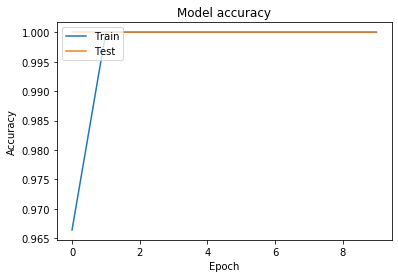

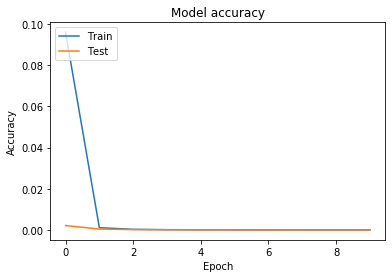

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# plotting training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')

plt.show()

### plotting Confusion matrix


In [58]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrix import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2498ab7a888>)

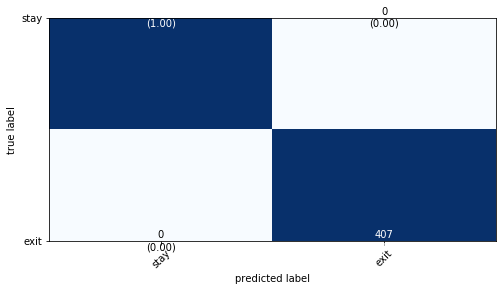

In [59]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = mat, figsize= (8,8),class_names=['stay','exit'],show_normed = True)